# 4. FEATURE ENGINEERING AND SELECTION

## 1. Introducing the Data

<AxesSubplot:>

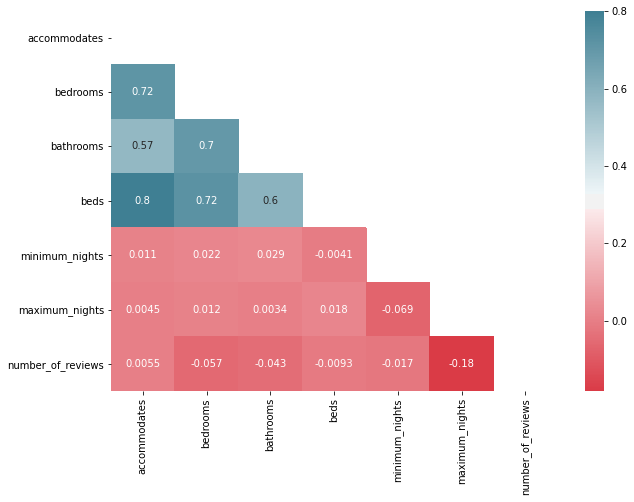

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_file = 'data/dc_train'
test_file = 'data/dc_test'
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

X_train = train.drop('price', axis=1)
y_train = train['price']

X_test = test.drop('price', axis=1)
y_test = test['price']

corr = X_train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
color = sns.diverging_palette(10, 220, as_cmap=True)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, mask=mask, cmap=color, annot=True)

## 2. Creating New Features
- beds/bedroom
- bathrooms/bedroom
- beds/accommodates
- bathrooms/accommodates
- bedrooms/accommodates

In [2]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

class FeatureCreator(BaseEstimator, TransformerMixin):    
    def __init__(self):
        self        
    def fit(self, df, y = None):                
        return self
    def transform(self, df):        
        cols = df.columns
        df = df[cols].copy()
        df['bd_per_bdrm'] = df['beds'] / df['bedrooms']
        df['bthrm_per_bdrm'] = df['bathrooms'] / df['bedrooms']        
        df['bd_per_accomm'] = df['beds'] / df['accommodates']
        df['bthrm_per_accomm'] = df['bathrooms'] / df['accommodates']
        df['bdrm_per_accomm'] = df['bedrooms'] / df['accommodates']
        df = df.replace(np.inf, 0)
        df = df[df.columns]
        return df
    
fc = FeatureCreator()
X_train_sample = fc.fit_transform(X_train[:100])
X_train_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accommodates       100 non-null    float64
 1   bedrooms           100 non-null    float64
 2   bathrooms          100 non-null    float64
 3   beds               100 non-null    float64
 4   minimum_nights     100 non-null    float64
 5   maximum_nights     100 non-null    float64
 6   number_of_reviews  100 non-null    float64
 7   bd_per_bdrm        100 non-null    float64
 8   bthrm_per_bdrm     100 non-null    float64
 9   bd_per_accomm      100 non-null    float64
 10  bthrm_per_accomm   100 non-null    float64
 11  bdrm_per_accomm    100 non-null    float64
dtypes: float64(12)
memory usage: 9.5 KB


In [3]:
X_train_sample.head()

,accommodates,bedrooms,bathrooms,beds,minimum_nights,maximum_nights,number_of_reviews,bd_per_bdrm,bthrm_per_bdrm,bd_per_accomm,bthrm_per_accomm,bdrm_per_accomm
0,4.0,1.0,1.0,2.0,2.0,1125.0,15.0,2.0,1.0,0.500000,0.250000,0.250000
1,4.0,1.0,1.0,1.0,1.0,1125.0,20.0,1.0,1.0,0.250000,0.250000,0.250000
2,2.0,1.0,1.0,1.0,1.0,1125.0,9.0,1.0,1.0,0.500000,0.500000,0.500000
3,5.0,2.0,2.0,3.0,3.0,730.0,19.0,1.5,1.0,0.600000,0.400000,0.400000
4,6.0,2.0,1.0,2.0,2.0,35.0,15.0,1.0,0.5,0.333333,0.166667,0.333333


## 3. Creating a Pipeline: Feature Creation and Standardization
- Freature Creation
- Data Standardization

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline(steps = [
    ('fc', FeatureCreator()),
    ('scaler', StandardScaler())
])

X_train_ = pipeline.fit_transform(X_train)
X_train_ = pd.DataFrame(X_train_)
X_train_.columns = X_train_sample.columns
X_train_.head()

,accommodates,bedrooms,bathrooms,beds,minimum_nights,maximum_nights,number_of_reviews,bd_per_bdrm,bthrm_per_bdrm,bd_per_accomm,bthrm_per_accomm,bdrm_per_accomm
0,0.392503,-0.249075,-0.436195,0.313088,-0.073419,0.697780,-0.018695,1.24376,0.195739,-0.239634,-0.827378,-0.719030
1,0.392503,-0.249075,-0.436195,-0.552628,-0.325020,0.697780,0.150325,-0.18472,0.195739,-1.373044,-0.827378,-0.719030
2,-0.593473,-0.249075,-0.436195,-0.552628,-0.325020,0.697780,-0.221520,-0.18472,0.195739,-0.239634,0.043896,0.291677
3,0.885491,0.943443,1.274127,1.178805,0.178182,-0.106969,0.116521,0.52952,0.195739,0.213731,-0.304613,-0.112606
4,1.378479,0.943443,-0.436195,0.313088,-0.073419,-1.522921,-0.018695,-0.18472,-0.923198,-0.995241,-1.117803,-0.382128


In [8]:
X_train_.max() - X_train_.min()

accommodates          7.394818
bedrooms             11.925184
bathrooms            13.682577
beds                 12.985748
minimum_nights       45.036635
maximum_nights        4.072643
number_of_reviews    11.425753
bd_per_bdrm          22.855683
bthrm_per_bdrm        8.951499
bd_per_accomm        13.317574
bthrm_per_accomm     13.940391
bdrm_per_accomm       8.085649
dtype: float64

## 4. KNN Model Training

- nei

In [ ]:
df = pd.DataFrame([1,2,np.inf])
df